# Text Analysis and Topic Modelling

Author: Jesús Cid Sueiro

Date: 2016/04/03


In this notebook we will explore some tools for text analysis in python. To do so, first we will import the requested python libraries.

In [12]:
%qtconsole

In [13]:
%matplotlib inline

# Required imports
from wikitools import wiki
from wikitools import category

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import gensim

import numpy as np
import lda
import lda.datasets

from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import pylab

from test_helper import Test

In [14]:
import pickle
data = pickle.load(open("wikiresults_culture.p", "U"))
D = data['D']
corpus_bow = data['corpus_bow']

In [15]:
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary.load('deerwester.dict')
corpus_bow = corpora.MmCorpus('deerwester.mm')
print dictionary


Dictionary(12471 unique tokens: [u'1869', u'birdfeed', u'woodi', u'chthonic', u'osiri']...)


## 3. Semantic Analysis

The dictionary `D` and the Bag of Words in `corpus_bow` are the key inputs to the topic model algorithms. The topic model algorithms in `gensim` assume that input documents are parameterized using the tf-idf model.

In [16]:
tfidf = gensim.models.TfidfModel(corpus_bow)

From now on, tfidf can be used to convert any vector from the old representation (bow integer counts) to the new one (TfIdf real-valued weights):

In [17]:
doc_bow = [(0, 1), (1, 1)]
tfidf[doc_bow]

[(0, 0.8707410517788962), (1, 0.49174182326397853)]

Or to apply a transformation to a whole corpus

In [18]:
corpus_tfidf = tfidf[corpus_bow]

### 3.1. Latent Semantic Indexing (LSI)

Now we are ready to apply a topic modeling algorithm. Latent Semantic Indexing is provided by `LsiModel`.

**Task**: Generate a LSI model with 5 topics for `corpus_tfidf` and dictionary `D`. You can check de sintaxis for [gensim.models.LsiModel](https://radimrehurek.com/gensim/models/lsimodel.html).

In [19]:
# Initialize an LSI transformation
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
# scode: lsi = <FILL IN>

From LSI, we can check both the topic-tokens matrix and the document-topics matrix.

Now we can check the topics generated by LSI. An intuitive visualization is provided by the `show_topics` method.

In [20]:
lsi.show_topics(num_topics=5, num_words=25, log=False, formatted=True)

[(0,
  u'0.238*"cat" + 0.196*"ref" + 0.143*"librari" + 0.139*"cite" + 0.136*"anthropolog" + 0.134*"common" + 0.119*"art" + 0.117*"scienc" + 0.116*"human" + 0.108*"social" + 0.106*"music" + 0.106*"right" + 0.105*"studi" + 0.101*"law" + 0.101*"cultur" + 0.097*"polit" + 0.093*"civil" + 0.091*"high" + 0.086*"book" + 0.084*"valu" + 0.084*"univers" + 0.082*"infobox" + 0.081*"system" + 0.080*"societi" + 0.080*"main"'),
 (1,
  u'0.603*"cat" + 0.366*"librari" + 0.252*"common" + 0.246*"infobox" + 0.179*"anthropolog" + 0.174*"classif" + 0.120*"main" + -0.119*"ref" + 0.104*"disciplin" + 0.102*"wikibook" + -0.085*"cite" + 0.085*"death" + 0.075*"academ" + 0.064*"see" + -0.064*"music" + 0.064*"narratolog" + 0.061*"semiot" + -0.059*"high" + -0.052*"film" + -0.051*"book" + -0.050*"valu" + 0.050*"conceptu" + 0.049*"exchang" + 0.049*"administr" + -0.048*"civil"'),
 (2,
  u'0.625*"librari" + -0.328*"cat" + -0.281*"anthropolog" + 0.224*"infobox" + -0.194*"scienc" + 0.184*"classif" + -0.133*"cultur" + -0.12

However, a more useful representation of topics is as a list of tuples `(token, value)`. This is provided by the `show_topic` method.

**Task**: Represent the columns of the topic-token matrix as a series of bar diagrams (one per topic) with the top 25 tokens of each topic.

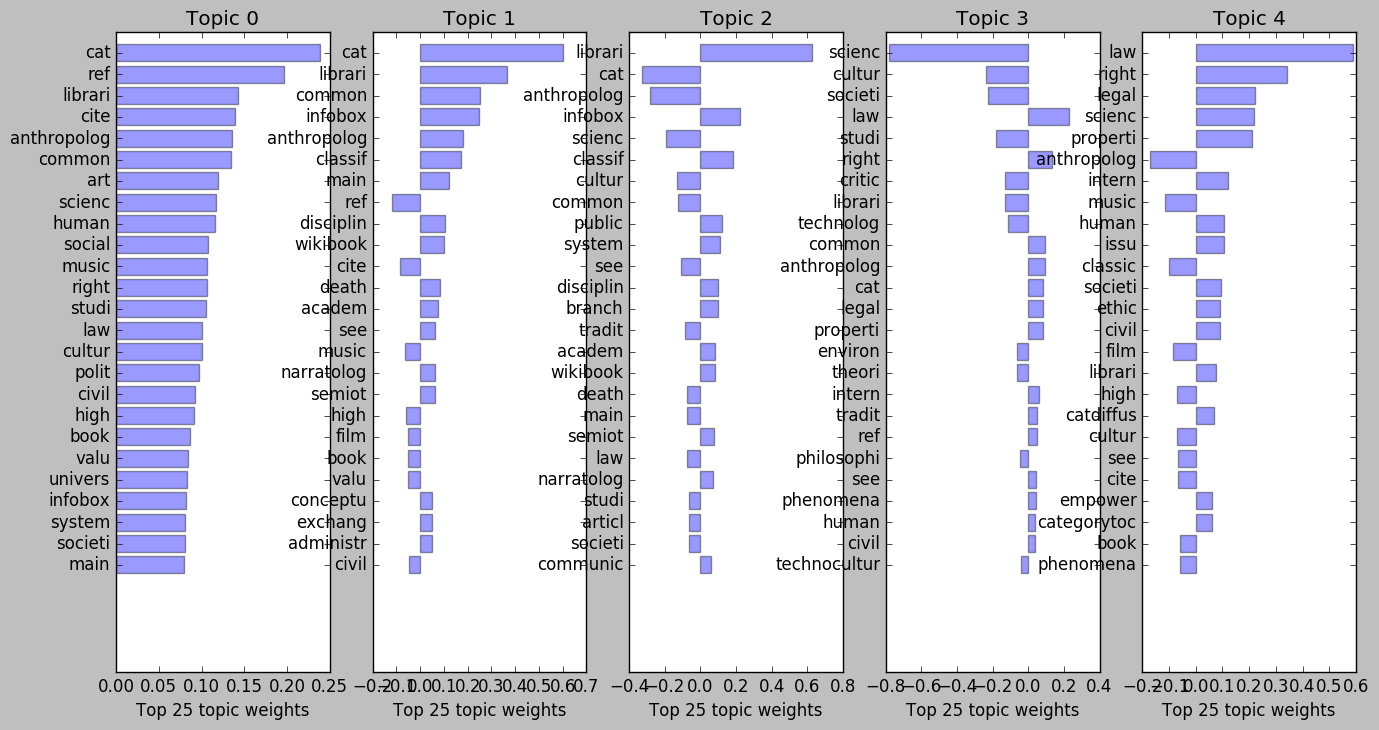

In [21]:
# SORTED TOKEN FREQUENCIES (II):
plt.rcdefaults()
n_topics = 5
n_bins = 25

# Example data
y_pos = range(n_bins-1, -1, -1)

pylab.rcParams['figure.figsize'] = 16, 8  # Set figure size

for i in range(n_topics):

    ### Plot top 25 tokens for topic i
    # Read i-thtopic
    # scode: <FILL IN>
    topic_i = lsi.show_topic(i, topn=n_bins)
    tokens = [t[0] for t in topic_i]
    weights = [t[1] for t in topic_i]
    
    # Plot
    # scode: <FILL IN>
    plt.subplot(1, n_topics, i+1)
    plt.barh(y_pos, weights, align='center', alpha=0.4)
    plt.yticks(y_pos, tokens)
    plt.xlabel('Top {0} topic weights'.format(n_bins))
    plt.title('Topic {0}'.format(i))

plt.show()

LSI approximates any document as a linear combination of the topic vectors. We can compute the topic weights for any input corpus entered as input to the `lsi` model.

In [22]:
# On real corpora, target dimensionality of
# 200–500 is recommended as a “golden standard”
# Create a double wrapper over the original 
# corpus bow  tfidf  fold-in-lsi
corpus_lsi = lsi[corpus_tfidf]
print corpus_lsi[0] 

[(0, 0.66613536668680839), (1, -0.22323015985007374), (2, -0.05775857020421258), (3, -0.073343782489860884), (4, -0.083023671786462722)]


**Task**: Find the document with the largest positive weight for topic 0. Compare the document and the topic.

- [x] La comparacion realizada es por simple LDA, no he comparado el documento entero :exclamation:

In [23]:
# Extract weights from corpus_lsi
# scode: weight0 = <FILL IN>
tfidf = gensim.models.TfidfModel(corpus_bow)
corpus_tfidf = tfidf[corpus_bow]
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=1) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi.show_topics(num_topics=1, num_words=25, log=False, formatted=True)

[(0,
  u'-0.238*"cat" + -0.196*"ref" + -0.143*"librari" + -0.139*"cite" + -0.136*"anthropolog" + -0.134*"common" + -0.119*"art" + -0.117*"scienc" + -0.116*"human" + -0.108*"social" + -0.107*"right" + -0.106*"music" + -0.106*"studi" + -0.101*"cultur" + -0.101*"law" + -0.097*"polit" + -0.094*"civil" + -0.091*"high" + -0.086*"book" + -0.084*"valu" + -0.084*"univers" + -0.082*"infobox" + -0.081*"system" + -0.080*"societi" + -0.080*"main"')]

In [24]:
# Get the transformer to topic 0
vec_lsi = list ()
id_list = 0
for text_vec in corpus_bow:
    vec_lsi.extend(lsi[text_vec])

nmax = max(vec_lsi,key=itemgetter(1))[1]



NameError: name 'itemgetter' is not defined

Mejorar esta forma de encontrar el elemento que tiene el máximo.

In [ ]:
for v in vec_lsi:
    if v[1] == nmax:
        index = id_list
    id_list +=1


In [ ]:





# Locate the maximum positive weight
# nmax = np.argmax(weight0)
print nmax
print weight0[nmax]
print corpus_lsi[nmax]

# Get topic 0
# scode: topic_0 = <FILL IN>

# Compute a list of tuples (token, wordcount) for all tokens in topic_0, where wordcount is the number of 
# occurences of the token in the article.
# scode: token_counts = <FILL IN>

print "Topic 0 is:"
print topic_0
print "Token counts:"
print token_counts

### 3.2. Latent Dirichlet Allocation (LDA)

There are several implementations of the LDA topic model in python:

* Python library `lda`.
* Gensim module: `gensim.models.ldamodel.LdaModel`
* Sci-kit Learn module: `sklearn.decomposition`

#### 3.2.1. LDA using Gensim

The use of the LDA module in `gensim` is similar to LSI. Furthermore, it assumes that a `tf-idf` parametrization is used as an input, which is not in complete agreement with the theoretical model, which assumes documents represented as vectors of token-counts.

To use LDA in gensim, we must first create a lda model object.

In [ ]:
ldag = gensim.models.ldamodel.LdaModel(
    corpus=corpus_tfidf, id2word=dictionary, num_topics=10, update_every=1, passes=10)

In [ ]:
ldag.print_topics()

#### 3.2.2. LDA using Sci-kit Learn

The input matrix to the `sklearn` implementation of LDA contains the token-counts for all documents in the corpus.
`sklearn` contains a powerfull `CountVectorizer` method that can be used to construct the input matrix from the `corpus_bow`. 

First, we will define an auxiliary function to print the top tokens in the model, that has been taken from the `sklearn` documentation.

In [ ]:
# Adapted from an example in sklearn site 
# http://scikit-learn.org/dev/auto_examples/applications/topics_extraction_with_nmf_lda.html

# You can try also with the dataset provided by sklearn in 
# from sklearn.datasets import fetch_20newsgroups
# dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'))

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    

    " ".join(ListaTokens) 

Now, we need a dataset to feed the Count_Vectorizer object, by joining all tokens in `corpus_clean` in a single string, using a space ' ' as separator.

**Task**: Join all tokens from each document in a single string, using a white space as separator.

In [ ]:
import pickle
data = pickle.load(open("wikiresults.corpus_clean.p", "U")) ##Add a 'U' to mode to open the file for input with universal newline
corpus_clean = data['corpus_clean']

In [25]:
print("Loading dataset...")
# scode: data_samples = <FILL IN>   # Usar join sobre corpus_clean.
data_samples = [" ".join(doc) for doc in corpus_clean]
data_samples = map(lambda x: " ".join(x), corpus_clean)

print 'Document 0:'
print data_samples[0][0:200], '...'

Loading dataset...
Document 0:
use social scienc natur use use mdi 2015 multipl imag align right direct vertic width 220 image1 caption1 human symbol ic express develop prehistor human reach behavior modern image2 caption2 religion ...


Now we are ready to compute the token counts.

In [26]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
n_features = 1000
#max_features only consider the top max_features ordered by term frequency.
#min_df ignore terms that have a document frequency strictly lower than the given threshold.
#max_df ignore terms that have a document frequency strictly higher than the given threshold 
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print tf[0][0][0]

Extracting tf features for LDA...
done in 0.356s.
  (0, 953)	20
  (0, 856)	37
  (0, 816)	14
  (0, 631)	6
  (0, 41)	3
  (0, 620)	1
  (0, 478)	2
  (0, 798)	1
  (0, 301)	2
  (0, 470)	33
  (0, 895)	8
  (0, 377)	12
  (0, 296)	20
  (0, 142)	7
  (0, 613)	11
  (0, 778)	8
  (0, 106)	12
  (0, 480)	5
  (0, 111)	8
  (0, 266)	220
  (0, 800)	3
  (0, 678)	3
  (0, 242)	4
  (0, 403)	5
  (0, 709)	8
  :	:
  (0, 503)	1
  (0, 688)	1
  (0, 22)	2
  (0, 14)	1
  (0, 657)	1
  (0, 32)	2
  (0, 286)	1
  (0, 215)	1
  (0, 3)	1
  (0, 13)	1
  (0, 527)	1
  (0, 323)	1
  (0, 28)	3
  (0, 279)	1
  (0, 273)	1
  (0, 392)	1
  (0, 44)	1
  (0, 980)	1
  (0, 530)	1
  (0, 107)	1
  (0, 923)	1
  (0, 559)	1
  (0, 928)	1
  (0, 206)	1
  (0, 713)	1


Now we can apply the LDA algorithm. 

**Task**: Create an LDA object with the following parameters: 
    n_topics=n_topics, max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0

In [29]:
n_samples = len (data_samples)
n_features = 10
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
# scode: lda = <FILL IN>

Fitting LDA models with tf features, n_samples=139 and n_features=10...


In [30]:
n_topics = 10
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

**Task**: Fit model `lda` with the token frequencies computed by `tf_vectorizer`.

In [31]:
t0 = time()

corpus_lda = lda.fit_transform(tf)

print("done in %0.3fs." % (time() - t0))

done in 1.487s.


In [33]:
n_top_words = 
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
ref cite book cultur right sea human use
Topic #1:
right human ref cite intern http nation law
Topic #2:
librari public ref religion cite branch right human
Topic #3:
religion ref religi bread cite bird http peopl
Topic #4:
film art ref cinema director cite use movi
Topic #5:
music civil ref cultur perform use common cite
Topic #6:
cultur valu individu ref social legal memori societi
Topic #7:
cultur ndash studi social art ref http scienc
Topic #8:
film ref music religion cite art religi includ
Topic #9:
languag educ cultur ref polici lo nation cite
()


NameError: global name 'ListaTokens' is not defined

**Exercise**: Represent graphically the topic distributions

**Exercise**: Explore the influence of the concentration parameters, $alpha$ (`doc_topic_prior` in `sklearn`) and $eta$(`topic_word_prior`). In particular observe how do topic and document distributions change as these parameters increase.

** Exercise**: The token dictionary and the token distribution have shown that:

1. Some tokens, despite being very frequent in the corpus, have no semantic relevance for topic modeling. Unfortunately, they were not present in the stopword list, and have not been elliminated before the analysis.

2. A large portion of tokens appear only once and, thus, they are not statistically relevant for the inference engine of the topic models.

Revise the entire corpus be removing from the corpus all these sets of terms.


** Exercise**: Note that we have not used the terms in the article titles, though the can be expected to containg relevant words for the topic modeling. Include the title words in the analyisis. In order to give them a special relevante, insert them in the corpus several time, so as to make their words more significant.




** Exercise**: The topic modelling algorithms we have tested in this notebook are non-supervised. This makes them difficult to evaluate objectivelly. In order to test if LDA captures real topics, construct a dataset as the mixture of wikipedia articles from 4 different categories, and test if LDA with 4 topics identifies topics closely related to the original categories.